# Análise de Caracteríticas dos Sobreviventes do Titanic

## Objetivo

Esse relatório tem o objetivo de analisar algumas características dos passageiros do Titanic para determinar se algumas delas guarda algum tipo de correlação entre ter sobrevivido ou não ao acidente.

Não serão feitas análises mais aprofundadas para avaliar diferenças estastíticas entre dados, portanto os resultados são apenas indicativos, porém não conclusivos.

## Conjunto de Dados para Análise 

O conjunto de dados que será analisado esta disponível através da página do kaggle para fins de treinamento em análise de dados e machine learning. Nesse conjunto de dados estao informações de 891 passageiros e tripulantes do Titanic.

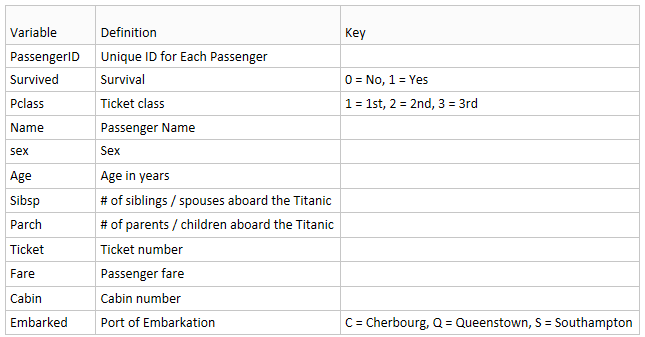

## Análise de Dados

### Fazendo Perguntas

O conjunto de dados deve ser utilizado para reponder quais poderiam ser as características que indicam alguma relevância para ter sobrevivido ou não ao desastre do Titanic.

Nesse relatório serão realizadas análises para responder as seguintes perguntas:
        - O gênero do passageiro mostra alguma influência entre sobreviventes?
        
        - Viajar acompanhado mostra algum aumento nas chances de sobrevivência?
                
		- A idade da pessoa foi um fator relevante?
                        
        - Status econômico foi um fator que aumentou a taxa de sobreviventes?
        
		- O local da cabine tem alguma influência?

### Agrupando e Limpando os Dados

Nessa etapa, vamos analisar os dados para identificar se os nomes das colunas e os tipo de dados estão condizentes com as melhores práticas.

Vamos analisar ainda se os dados são relevantes para as análises e se temos problemas como dados duplicados ou ausentes.

Vamos iniciar carregando o conjunto de dados.

In [1]:
# Importanto os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# Carregando os conjunto de dados
df = pd.read_csv('DataSet/titanic-data-6.csv')

# Confirmando se os dados foram carregados corretamente
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As colunas tem nomes que poderiam ser mais explícitos sobre os dados que estão inseridos nelas.

Além disso, as colunas tem letras maiúsculas e minúsculas. O indicado é que tenham apenas uma dessas formatações.

Para corrigir, vamos alterar os nomes das colunas.

In [3]:
# Definindo os novos nomes das colunas
new_labels = ['passenger_id', 'survived', 'passenger_class', 'name', 'sex', 'age', 'sibling_spouse', 
              'parent_children', 'ticket_id', 'fare', 'cabin_id', 'port_embarkation']

# Alterando os nomes
df.columns = new_labels

# Conferindo se a alteração foi bem sucedida
df.columns

Index(['passenger_id', 'survived', 'passenger_class', 'name', 'sex', 'age',
       'sibling_spouse', 'parent_children', 'ticket_id', 'fare', 'cabin_id',
       'port_embarkation'],
      dtype='object')

Agora que alteramos os nomes das colunas, vamos analisar se os dados estão com o tipo correto.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passenger_id        891 non-null int64
survived            891 non-null int64
passenger_class     891 non-null int64
name                891 non-null object
sex                 891 non-null object
age                 714 non-null float64
sibling_spouse      891 non-null int64
parent_children     891 non-null int64
ticket_id           891 non-null object
fare                891 non-null float64
cabin_id            204 non-null object
port_embarkation    889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


A coluna "survived" parece ter o tipo incorreto. Nessa coluna está a indicação se o passageiro sobreviveu ou não, porém está com o tipo inteiro.

Esse valor está sendo utilizado como uma referencia sendo 0 para "nao sobrevivente" e 1 para "sobrevivente". No entanto, faz mais sentido guardá-lo como uma string com o valor literal.

A coluna "age" tambem parece estar incorreto tambem por estar como um float e sabemos que nao existem idades com ponto flutuante. Entretanto, isso acontece pois estao sendo identificados os que tem menos de um ano e os que tiveram a idade estimada dessa com numeros com ponto flutuante.

Sendo assim, vamos corrigir apenas a coluna dos sobreviventes.

In [5]:
# Checando os valores atuais
print('Antes da modificação:')
print(df['survived'].value_counts())

# Alterando os dados
df['survived'] = df['survived'].apply(lambda x: 'no' if x==0 else 'yes')

# Conferindo se esta correto
print('Após a modificação')
print(df['survived'].value_counts())
print(f'Tipo de dado: {type(df["survived"][0])}')

Antes da modificação:
0    549
1    342
Name: survived, dtype: int64
Após a modificação
no     549
yes    342
Name: survived, dtype: int64
Tipo de dado: <class 'str'>


Agora temos as colunas com nomes bem identificados e os dados com os tipos corretos.

Vamos analisar os valores para identificar possíveis problemas.

Primeiro, vamos analisar se temos valores duplicados.

In [6]:
print(f'O conjunto de dados tem {df.duplicated().sum()} linhas duplicadas')

O conjunto de dados tem 0 linhas duplicadas


Ótimo! Não temos dados duplicados.

Agora precisamos saber sobre os valores ausentes

In [7]:
# Identificando o total de colunas com valores nulos e seus nomes
print(f'O conjunto de dados tem {df.isnull().any().sum()} colunas com valores nulos:')
for column in df.columns:
    if df[column].isnull().any():
        print(f'{column} - {df[column].isnull().sum()} registros nulos')

O conjunto de dados tem 3 colunas com valores nulos:
age - 177 registros nulos
cabin_id - 687 registros nulos
port_embarkation - 2 registros nulos


Temos um grande problema aqui!

Os dados de idade e, principalmente, identificação da cabine tem muitos dados com valores nulos.

É importante considerar também que nem todas as analises dependem dos valores dessas colunas. Portanto, vamos manter esses dados, porém quando utilizados, precisamos lembrar do impacto que manter essas colunas podem ter na análise.

Apesar de manter as colunas, vamos preencher os valores ausentes com valores padrões.

No caso da cabine, vamos apenas identificar que são colunas ausentes.

Para a idade, os valores nulos serão preenchidos com o valor médio das idades, porém, antes, vamos avaliar o impacto nos dados.

In [8]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [9]:
# Preechendo os valores ausentes, porém não modificando ainda no dataset original
df1 = df['age'].fillna(df['age'].mean())
print(df1.describe())

# Verificando a taxa de sobrevivência de indivíduos sem idade identificada
df2 = df[df['age'].isnull()]
print(f"\nTaxa de sobrevivencia dos individuos sem idade identificada: {(df2['survived'].value_counts()['yes']/df2['survived'].value_counts().sum()):.2%}")

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

Taxa de sobrevivencia dos individuos sem idade identificada: 29.38%


Comparando as duas análises, e possível perceber uma tendência dos dados de se deslocarem para o valor da média. O que sofreu maior alteracao foi o 75 percentil com variacao de 3 anos - de 38 anos para 35.

O impacto nos dados não parece ser muito relevante, mas adicionaríamos relativamente muitas amostras com elevado grau de incerteza (177 de um total de 891 - aproximadamente 20% da amostra), além de impactar negativamente na taxa de sobrevivência para indivíduos com idade próxima a média das idades.

Sendo assim, vamos executar a alteração, mas precisamos ter isso em mente quando analisarmos os dados com base na idade.

In [10]:
# Confirmando o preenchimento dos valores ausentes com a média da idade
df['age'] = df['age'].fillna(df['age'].mean())

Para a coluna das cabines, poderíamos preencher também com alguma informação padrão como "NI" - Not Informed. Entretanto, não vamos proceder com a alteração, pois será mais fácil descartar os valores sem informação utilizando o parâmetro "dropna=True" da funções.

Para a informação das cabines, primeiramente, vamos ver como estão inseridos os valores.

In [11]:
# Consultando os valores e contagem da coluna com informação das cabines
print('Informacoes Gerais Sobre a Coluna de ID da cabine')
print(df['cabin_id'].describe())

Informacoes Gerais Sobre a Coluna de ID da cabine
count             204
unique            147
top       C23 C25 C27
freq                4
Name: cabin_id, dtype: object


É possível notar que a ausência de muitos valores não é a única dificuldade de trabalhar com essa informação. A ocorrência de muitos valores únicos também não é muito válido para analisar alguma tendência.

Outro problema é que algumas linhas tem a informação de mais de uma cabines. Vamos analisar os casos que temos mais de uma cabine informada.

In [12]:
df1 = df[df['cabin_id'].str.contains(' ', na=False)]
df1['cabin_id'].unique()

array(['C23 C25 C27', 'F G73', 'D10 D12', 'B58 B60', 'F E69', 'C22 C26',
       'B57 B59 B63 B66', 'B96 B98', 'B51 B53 B55', 'F G63', 'C62 C64',
       'B82 B84'], dtype=object)

É possível notar que os valores que temos mais de uma cabine informada, todas estão no mesmo deck e elas tem números relativamente proximos.

Em alguns casos, todos para um deck "F", temos apenas a indicacao do possível deck "F" e, em seguida, uma informação completa de cabine, porém em outro deck. Nesses casos, será considerada a informação mais completa: deck e número da cabine.

Para tratar os dados dessa coluna, vamos considerar duas premissas:
    1 - A letra que precede o número indica o deck que a cabine está localizada
    2 - Para as informações duplicadas, será considerada apenas a primeira cabine informada na coluna. Se analisarmos essas ocorrências, percebemos que os números são próximos e, portanto, não deve adicionar considerável nível de incerteza aos resultados.
    
Tratando os dados dessa coluna para exibir a informação conforme premissas acima:

In [13]:
# Criando as colunas que serão inseridas as informações do deck e número da cabine.
# De inicio será apenas uma cópia da coluna "cabin_id"
df['cabin_deck'] = df['cabin_id'].copy()
df['cabin_num'] = df['cabin_id'].copy()

# Alterando a coluna "cabin_deck" para exibir apenas a informação do deck
df['cabin_deck'] = df['cabin_deck'].str.slice(0,1)

# De forma semelhante, alteramos a coluna "cabin_num" para exibir apenas o número
df['cabin_num'] = df['cabin_num'].str.extract('(\d+)')
df['cabin_num'] = df['cabin_num'].dropna().astype('float') # Não utilizamos 'int', pois os valores nulos são considerados float

# Confirmando se a alteração foi bem sucedida
index=[10,12,13]
df.iloc[:,index].dropna().head(10)

,cabin_id,cabin_deck,cabin_num
1,C85,C,85.0
3,C123,C,123.0
6,E46,E,46.0
10,G6,G,6.0
11,C103,C,103.0
21,D56,D,56.0
23,A6,A,6.0
27,C23 C25 C27,C,23.0
31,B78,B,78.0
52,D33,D,33.0


É possivel observar acima que as alterações conforme as premissas ocorreram com sucesso.

Agora vamos lidar com a particularidade de algumas cabines que estao no Deck "F".

In [14]:
# Exibindo os valores que queremos alterar
index=[10,12,13]
df.query('cabin_deck=="F"').iloc[:,index]

,cabin_id,cabin_deck,cabin_num
66,F33,F,33.0
75,F G73,F,73.0
128,F E69,F,69.0
148,F2,F,2.0
183,F4,F,4.0
193,F2,F,2.0
340,F2,F,2.0
345,F33,F,33.0
516,F33,F,33.0
618,F4,F,4.0


Como explicado antriormente, para esses casos, vamos considerar os resultados que tenham a informação mais completa da cabine. No nosso caso, vamos alterar os valores nos indices 75, 128, 699 e 715 para o deck "G", ja que temos tambem o número da cabime desse deck.

Como temos apenas quatro valores, vamos criar uma série de dados identificados com os mesmos índices dos valores que queremos atualizar e fazer a alteração.

In [15]:
# Criando a série com os valores
new_values = pd.Series(['G', 'E', 'G', 'G'], index = [75, 128, 699, 715])

# Atualizando os dados
df['cabin_deck'].update(new_values)

# Conferindo se a atualização foi bem sucedida
df.query('cabin_deck == "F"').iloc[:,index]

,cabin_id,cabin_deck,cabin_num
66,F33,F,33.0
148,F2,F,2.0
183,F4,F,4.0
193,F2,F,2.0
340,F2,F,2.0
345,F33,F,33.0
516,F33,F,33.0
618,F4,F,4.0
776,F38,F,38.0


Agora que temos a informação das cabines no formato que queremos, podemos excluir a coluna "cabin_id" que agora tem informações irrelevantes.

In [16]:
# Excluindo a coluna "cabin_id"
df.drop('cabin_id', axis=1, inplace=True)

Outra analise dos dados que precisamos realizar é com as colunas que guardam informações sobre os integrantes da família.

Queremos ter algum insight sobre o impacto de viajar acompanhado com a taxa de sobrevivência. Para tanto, vamos utilizar os dados das colunas "siblings_spouse" e "parent_children" para essa inferência.

Como a pergunta se refere a viajar acompanhado, sem especificar de quem, vamos somar os valores das duas colunas para determinar se ter mais pessoas como acompanhantes aumentou a taxa de sobrevivência.

In [17]:
# Criando a coluna da soma dos acompanhantes
df['family_size'] = df['sibling_spouse'] + df['parent_children']

# Criando uma coluna mais geral, apenas para mostrar se estava viajando sozinho ou não
df['travel_alone'] = df['family_size'].apply(lambda x: 'yes' if x==0 else 'no')

# Conferindo se as informações nas colunas estão corretas
print('Viajantes Acompanhados:')
print(df.query('travel_alone == "no"')['family_size'].value_counts())
print('\nViajantes Desacompanhados:')
print(df.query('travel_alone == "yes"')['family_size'].value_counts())

Viajantes Acompanhados:
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family_size, dtype: int64

Viajantes Desacompanhados:
0    537
Name: family_size, dtype: int64


A última parte do codigo é apenas uma validação do campo criado. Não temos viajantes acompanhados com tamanho de família igual a zero e não temos viajantes desacompanhados com tamanho de família maior que zero. Os dados estão corretos.

Com essa última alteração, temos nosso conjunto de dados com os dados e no formato próprios para iniciar a exploração dos dados.

In [18]:
# Conferindo nosso conjunto de dados para os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
passenger_id        891 non-null int64
survived            891 non-null object
passenger_class     891 non-null int64
name                891 non-null object
sex                 891 non-null object
age                 891 non-null float64
sibling_spouse      891 non-null int64
parent_children     891 non-null int64
ticket_id           891 non-null object
fare                891 non-null float64
port_embarkation    889 non-null object
cabin_deck          204 non-null object
cabin_num           200 non-null float64
family_size         891 non-null int64
travel_alone        891 non-null object
dtypes: float64(3), int64(5), object(7)
memory usage: 104.5+ KB


In [19]:
# Conferindo nosso conjunto de dados para o formato da tabela
df.head(10)

,passenger_id,survived,passenger_class,name,sex,age,sibling_spouse,parent_children,ticket_id,fare,port_embarkation,cabin_deck,cabin_num,family_size,travel_alone
0,1,no,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,NaN,NaN,1,no
1,2,yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,85.0,1,no
2,3,yes,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,NaN,NaN,0,yes
3,4,yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,C,123.0,1,no
4,5,no,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,NaN,NaN,0,yes
5,6,no,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,NaN,NaN,0,yes
6,7,no,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,E,46.0,0,yes
7,8,no,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,NaN,NaN,4,no
8,9,yes,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,NaN,NaN,2,no
9,10,yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,NaN,NaN,1,no


Vamos então criar um arquivo com as edições para futuras utilizações.

In [20]:
# Criando o conjunto de dados
df.to_csv('DataSet/titanic_edited.csv', index=False)

### Explorar - EDA

Nessa etapa vamos começar a explorar os dados para entender as relacões que podem existir entre eles, além de deixá-los mais propensos a trazer as repostas para as perguntas geradas.

Primeiro, vamos analisar a ocorrência de algum valor outlier.

In [21]:
df.describe()

,passenger_id,passenger_class,age,sibling_spouse,parent_children,fare,cabin_num,family_size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,200.00000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,50.49000,0.904602
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429,35.39497,1.613459
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,2.00000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400,22.00000,0.000000
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200,43.00000,0.000000
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000,77.25000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,148.00000,10.000000


Os valores de "siblings_spouse", "parent_children" e "fare" merecem um pouco de atenção.

O valor máximo está muito acima da média, mesmo se considerarmos o desvio padrão. Em realidade, o valor máximo está muito acima do 75 percentil.

Primeiro vamos analisar a tarifa. É possível que o valor máximo seja bem maior por ser uma passagem da primeira classe e a minoria do público viajava nessa classe. Se olharmos a coluna "passenger_class" percebemos que menos de 25% dos passageiros analisados viajaram na primeira classe.

Vamos analisar os valores das tarifas agrupados por classe para avaliar.

In [22]:
df.groupby('passenger_class')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
passenger_class,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


É possível notar uma enorme variação no valor da passagem em todas as classes, inclusive tendo todas as classes o valor minimo como zero.

Considerando dessa forma, a grande variação em todas as classes sugere que o valor máximo discrepante seria algo normal e não um problema com os dados. No evento de utilizar essa informação, devemos ter em mente a grande variação desses valores.

As outras colunas que mostraram possíveis outliers foram as colunas relacionadas aos acompanhantes.

Vamos exibir essas colunas para avaliar se os valores máximos são possíveis problemas nos dados. 

In [23]:
# criando um índice para ver apenas as colunas interessantes para análise
index = np.r_[3, 6:9]

# Exibindo as informações das colunas ordenadas pela coluna "siblings_spouse"
df.iloc[:,index].sort_values('sibling_spouse', ascending=False).head(10)

,name,sibling_spouse,parent_children,ticket_id
159,"Sage, Master. Thomas Henry",8,2,CA. 2343
180,"Sage, Miss. Constance Gladys",8,2,CA. 2343
201,"Sage, Mr. Frederick",8,2,CA. 2343
792,"Sage, Miss. Stella Anna",8,2,CA. 2343
846,"Sage, Mr. Douglas Bullen",8,2,CA. 2343
863,"Sage, Miss. Dorothy Edith ""Dolly""",8,2,CA. 2343
324,"Sage, Mr. George John Jr",8,2,CA. 2343
59,"Goodwin, Master. William Frederick",5,2,CA 2144
71,"Goodwin, Miss. Lillian Amy",5,2,CA 2144
386,"Goodwin, Master. Sidney Leonard",5,2,CA 2144


Analisando o resultado podemos considerar que os dados são consistentes. Temos dados de sete viajantes que estavam com oito irmãos ou conjuges. Além disso, os sobrenomes são iguais e a identificação da passagem sugere que foram compradas juntos.

Vamos executar a mesma análise para a coluna dos pais ou filhos.

In [24]:
# Exibindo as informações das colunas ordenadas pela coluna "parent_children"
df.iloc[:,index].sort_values('parent_children', ascending=False).head(10)

,name,sibling_spouse,parent_children,ticket_id
678,"Goodwin, Mrs. Frederick (Augusta Tyler)",1,6,CA 2144
638,"Panula, Mrs. Juha (Maria Emilia Ojala)",0,5,3101295
885,"Rice, Mrs. William (Margaret Norton)",0,5,382652
610,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",1,5,347082
25,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",1,5,347077
13,"Andersson, Mr. Anders Johan",1,5,347082
438,"Fortune, Mr. Mark",1,4,19950
360,"Skoog, Mr. Wilhelm",1,4,347088
167,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",1,4,347088
567,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,4,349909


In [25]:
# Exibindo a informação da família "Goodwin"
df[df['name'].str.contains('Goodwin')]

,passenger_id,survived,passenger_class,name,sex,age,sibling_spouse,parent_children,ticket_id,fare,port_embarkation,cabin_deck,cabin_num,family_size,travel_alone
59,60,no,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,S,NaN,NaN,7,no
71,72,no,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,S,NaN,NaN,7,no
386,387,no,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,S,NaN,NaN,7,no
480,481,no,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,S,NaN,NaN,7,no
678,679,no,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,S,NaN,NaN,7,no
683,684,no,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,S,NaN,NaN,7,no


Novamente, a análise dos dados não indicam problema com o valor máximo. Primeiramente por não ter grandes diferencas entre os outros maiores valores e depois porque temos as informações de cinco dos seis filhos.

Agora vamos analisar os dados que estamos propensos a utilizar para responder nossas perguntas: gênero e identificação da cabine.

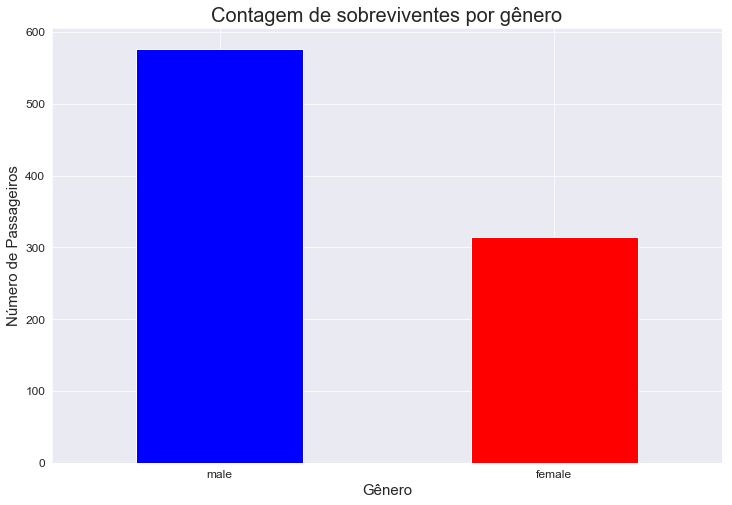

In [26]:
# Plotando os dados com base no gênero dos passageiros
df1 = df['sex'].value_counts().plot(kind='bar', figsize=(12,8), fontsize=12, rot='horizontal', color=['blue','red'])
df1.set_xlabel('Gênero', fontsize=15)
df1.set_ylabel('Número de Passageiros', fontsize=15);
df1.set_title('Contagem de sobreviventes por gênero', fontsize=20);


Do gráfico acima, podemos ver que, por conta da diferença no número de homens e mulheres, precisamos ter cuidado quando analisarmos com base no gênero. É possível que tenhamos o resultado de mais homens terem sobrevivido, porém isso pode ser resultado do número absoluto de indivíduos ser maior.

In [27]:
# Exibindo a matriz de correlacoes do conjunto de dados
df.corr()

,passenger_id,passenger_class,age,sibling_spouse,parent_children,fare,cabin_num,family_size
passenger_id,1.000000,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.035941,-0.040143
passenger_class,-0.035144,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.036776,0.065997
age,0.033207,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.040097,-0.248512
sibling_spouse,-0.057527,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.064264,0.890712
parent_children,-0.001652,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.117619,0.783111
fare,0.012658,-0.549500,0.091566,0.159651,0.216225,1.000000,0.052416,0.217138
cabin_num,0.035941,-0.036776,0.040097,-0.064264,-0.117619,0.052416,1.000000,-0.116942
family_size,-0.040143,0.065997,-0.248512,0.890712,0.783111,0.217138,-0.116942,1.000000


Analisando as correlações gerais do conjunto de dados, é possível notar uma forte correlação negativa entre classe do passageiro e tarifa. Essa conclusão é um tanto óbvia pois quanto menor a classe (1a, 2a, 3a) é maior o preço da passagem.

Notamos tambem que existe uma correlação moderada e possitiva entre os valores das colunas "siblings_spouse" e "parent_children". Isso pode indicar que viagens em família foi comum no Titanic.

Há ainda uma correlação moderada e negativa entre a classe de viagem e a idade do passageiro. O que nos leva a supor que teríamos passgeiros mais velhos na primeira classe.

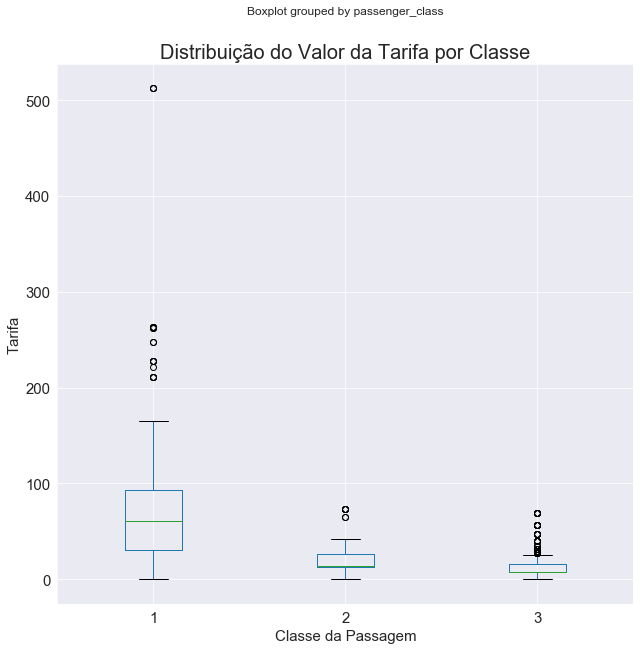

In [28]:
# Exibindo grafico que indica a entre classe da passagem x tarifa:
df1 = df.boxplot('fare','passenger_class', figsize=(10,10), fontsize=15)
df1.set_xlabel('Classe da Passagem', fontsize=15)
df1.set_ylabel('Tarifa', fontsize=15)
df1.set_title('Distribuição do Valor da Tarifa por Classe', fontsize=20);

A correlação entre classe da passagem e tarifa pode ser percebida pela distribuição acima.

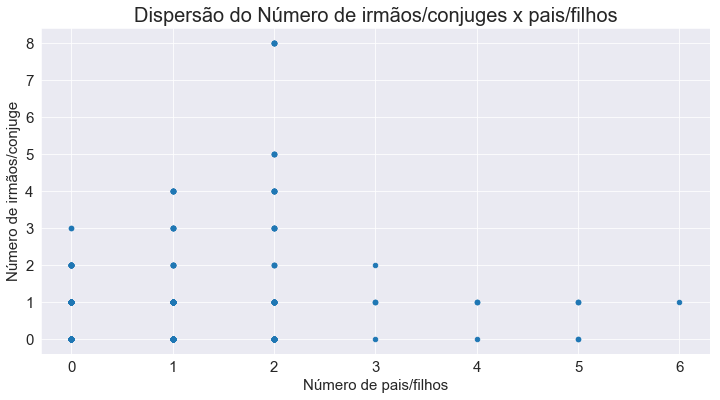

In [29]:
# Exibindo grafico de distribuição:
df1 = df.plot(kind='scatter', y='sibling_spouse', x='parent_children', fontsize=15, figsize=(12,6))
df1.set_xlabel('Número de pais/filhos', fontsize=15)
df1.set_ylabel('Número de irmãos/conjuge', fontsize=15)
df1.set_title('Dispersão do Número de irmãos/conjuges x pais/filhos', fontsize=20);

Para o caso das colunas com informações dos familiares acompanhados, apesar de mostrar um valor relativamente alto da correlação, a distribuição não mostra uma tendência de aumentar os valores do eixo Y com o aumento dos valores do eixo X.

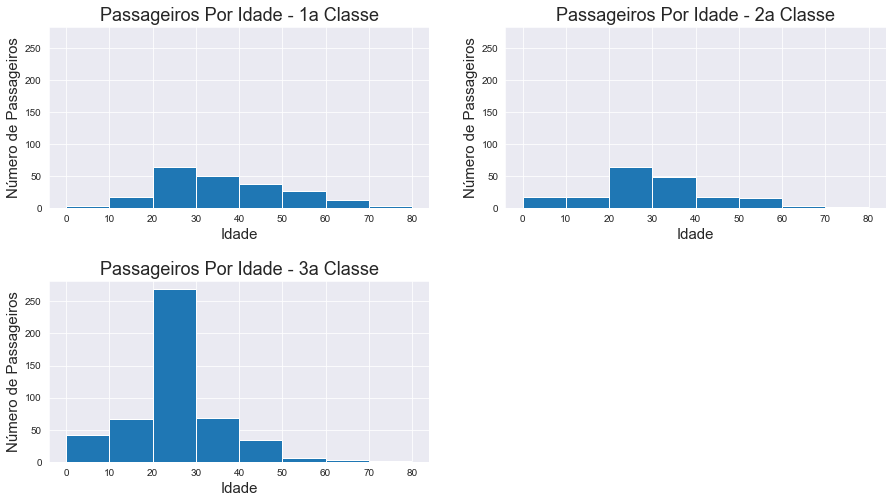

In [30]:
# Definindo os valores
first_class = df.query('passenger_class == 1')['age']
second_class = df.query('passenger_class == 2')['age']
third_class = df.query('passenger_class == 3')['age']

# Definindo o tamanho do gráfico
plt.figure(figsize=(15,8))
plt.subplots_adjust(hspace=0.4)

# Plotanto o primeiro gráico
ax1 = plt.subplot(221)
plt.hist(first_class, bins=np.arange(0,81,10), histtype='bar')
plt.title('Passageiros Por Idade - 1a Classe', fontsize=18)
plt.xlabel('Idade', fontsize=15)
plt.ylabel('Número de Passageiros', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Plotanto o segundo gráfico
ax2 = plt.subplot(222, sharey=ax1)
plt.hist(second_class, bins=np.arange(0,81,10), histtype='bar')
plt.title('Passageiros Por Idade - 2a Classe', fontsize=18)
plt.xlabel('Idade', fontsize=15)
plt.ylabel('Número de Passageiros', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Plotanto o terceiro gráfico
ax3 = plt.subplot(223, sharey=ax1)
plt.hist(third_class, bins=np.arange(0,81,10), histtype='bar')
plt.title('Passageiros Por Idade - 3a Classe', fontsize=18)
plt.xlabel('Idade', fontsize=15)
plt.ylabel('Número de Passageiros', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

No caso da idade e classe da passagem, podemos ver que a primeira classe tem o histograma mais deslocado para a direita em relação aos histogramas das outras classes, indicando que os passageiros mais velhos estavam em maior número nessa classe.

A terceira classe apresenta um histograma assimétrico para a direita, ou seja, valores maiores de idade apresentam uma frequência bem mais baixa.

É importante notar o pico no intervalo de 20 a 30 anos que deve ser influência da alteração que fizemos preenchendo as idades ausentes com a média das idades.

### Conclusões

Nesse parte vamos identificar as características que sugerem maior propabilidade de sobrevivência. Sendo assim, temos interesse nesse momento apenas nas informações dos sobrevivententes.

Vamos criar um dataframe apenas com os registros dos sobreviventes para essa etapa.

In [31]:
# Criando o dataframe
df_survived = df.query('survived == "yes"')

# Confirmando que só temos todos os dados apenas dos sobreviventes
assert df_survived.shape[0] == df.survived.value_counts()['yes']

#### Pergunta 1 - O gênero do passageiro mostra alguma influência entre sobreviventes?

Como vimos na fase de exploração, nesse momento precisamos ter cuidado com os números, pois temos mais homens que mulheres no nosso conjunto de dados. Portanto, para eliminar a influência do número absoluto de ocorrências de cada gênero, vamos analisar o resultado normalizado.

In [32]:
def survival_percentage(column):
    """
    Função que calcula a porcentagem de sobreviventes de duas amostras
    
    Argumentos:
        column: Coluna com as informações que serão avaliadas
        
    Retorna:
        :return: Lista com os valores
    """
    
    # Obtendo o total de viajntes
    total1 = df[column].value_counts()[x_axis[0]]
    total2 = df[column].value_counts()[x_axis[1]]
    
    # Obtendo o total de sobreviventes
    survived1 = df_survived[column].value_counts()[x_axis[0]]
    survived2 = df_survived[column].value_counts()[x_axis[1]]
    
    # Obetendo o percentual de sobreviventes
    survived_rate1 = survived1/total1
    survived_rate2 = survived2/total2
    
    return [survived_rate1, survived_rate2]


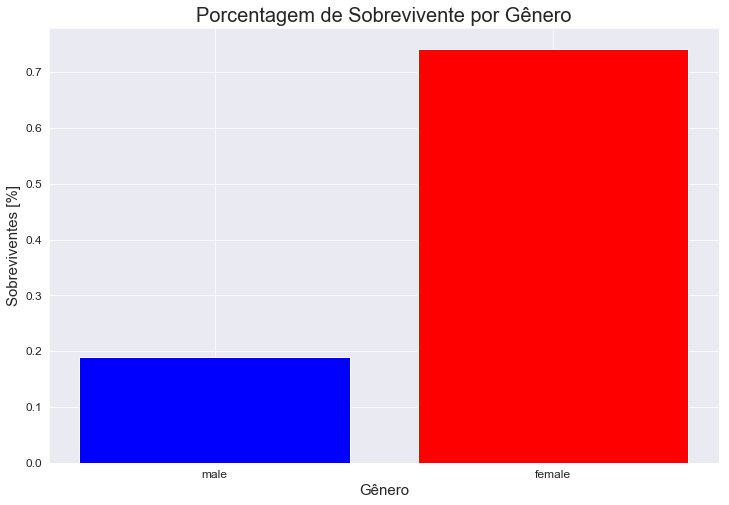

In [33]:
# Gerando gráfico da porcentagem de sobreviventes por gênero
x_axis = ['male', 'female']
y_axis = survival_percentage('sex')
plt.figure(figsize=(12,8))
plt.bar(x_axis, y_axis, color=['blue', 'red'])
plt.title('Porcentagem de Sobrevivente por Gênero', fontsize=20)
plt.xlabel('Gênero', fontsize=15)
plt.ylabel('Sobreviventes [%]', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

Do gráfico acima e fácil notar que, nos passageiros do nosso conjunto de dados, uma porcentagem muito maior de mulheres sobreviveram ao desastre do Titanic.

A taxa de sobrevivência das mulheres foi maior que 70% enquanto a dos homens foi proxima de 20%.

#### Pergunta 2 - Viajar acompanhado mostra algum aumento nas chances de sobrevivência?

Inicialmente, vamos ver os dados da coluna viajando sozinho ou nao.

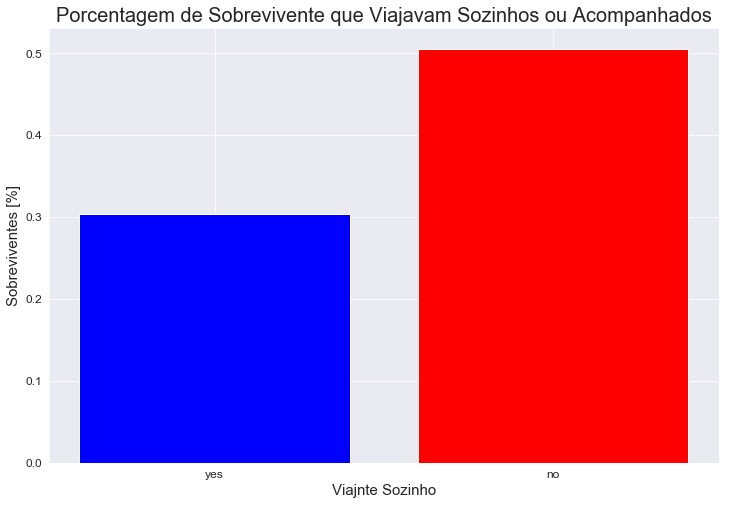

In [34]:
# Gerando grafico da porcentagem de sobreviventes que viajavam acompanhados e que nao viajavam acompanhados
x_axis = ['yes', 'no']
y_axis= survival_percentage('travel_alone')
plt.figure(figsize=(12,8))
plt.bar(x_axis, y_axis, color=['blue', 'red'])
plt.title('Porcentagem de Sobrevivente que Viajavam Sozinhos ou Acompanhados', fontsize=20)
plt.xlabel('Viajnte Sozinho', fontsize=15)
plt.ylabel('Sobreviventes [%]', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

O gráfico acima indica um possível aumento de 20% nas chances de sobrevivência se estivesse viajando acompanhando.

Outra questâo que podemos colocar é se o tipo de familiar tem alguma relevância.

Travaling With Sibling/Spouse Ratio: 46.64%
Travaling With Parent/Children Ratio: 51.17%


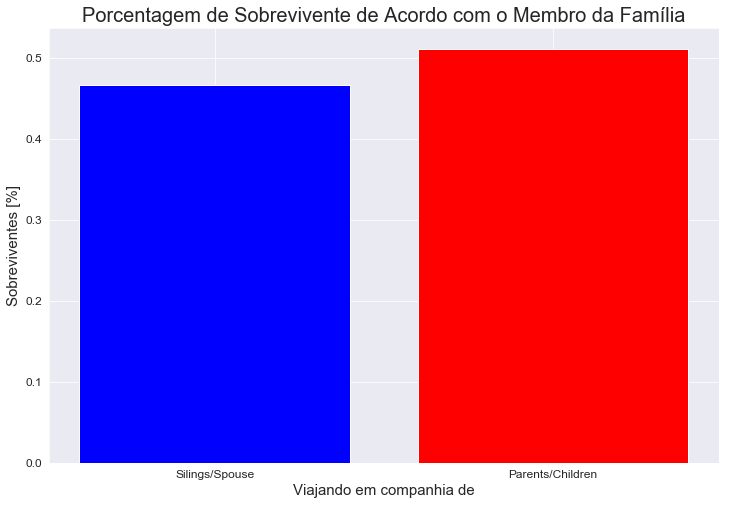

In [35]:
# Obtendo o total de viajntes acompanhados e desacompanhado
# Não podemos usar a função criada, pois no nosso conjunto de dados não existe a coluna que indica apenas
#     se tem ou nao cada tipo de parente. Peecisamos criar um dataframe novo apenas com essa informação.
sibsp_total = df['sibling_spouse'].apply(lambda x: "no" if x==0 else "yes")
parch_total = df['parent_children'].apply(lambda x: "no" if x==0 else "yes")

# Obtendo o total de sobreviventes acompanhados e desacompanhado
sibsp_survived = df_survived['sibling_spouse'].apply(lambda x: "no" if x==0 else "yes")
parch_survived = df_survived['parent_children'].apply(lambda x: "no" if x==0 else "yes")

# Obtendo os percentuais
sibsp_survived_rate = sibsp_survived.value_counts()['yes']/sibsp_total.value_counts()['yes']
parch_survived_rate = parch_survived.value_counts()['yes']/parch_total.value_counts()['yes']

# Plotando o gráfico
x_axis = ['Silings/Spouse', 'Parents/Children']
y_axis = [sibsp_survived_rate, parch_survived_rate]
plt.figure(figsize=(12,8))
plt.bar(x_axis, y_axis, color=['blue', 'red'])
plt.title('Porcentagem de Sobrevivente de Acordo com o Membro da Família', fontsize=20)
plt.xlabel('Viajando em companhia de', fontsize=15)
plt.ylabel('Sobreviventes [%]', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

print(f'Travaling With Sibling/Spouse Ratio: {sibsp_survived_rate:.2%}')
print(f'Travaling With Parent/Children Ratio: {parch_survived_rate:.2%}')

Percebemos que a viagem com pais ou filhos tem um percentual um pouco maior de sobreviventes, porém não é conclusivo que são estatisticamente diferentes.

Como vimos um aumento grande de porcentagem de sobrevivência para os viajantes acompanhados e isso não se reproduziu para o tipo de acompanhante, vamos analisar se o numero de acompanhantes tem alguma influência.

Vamos exibir a distribuicao dos valores daqueles que viajavam com familia para entender se a quantidade de acompanhantes era algo relevante.

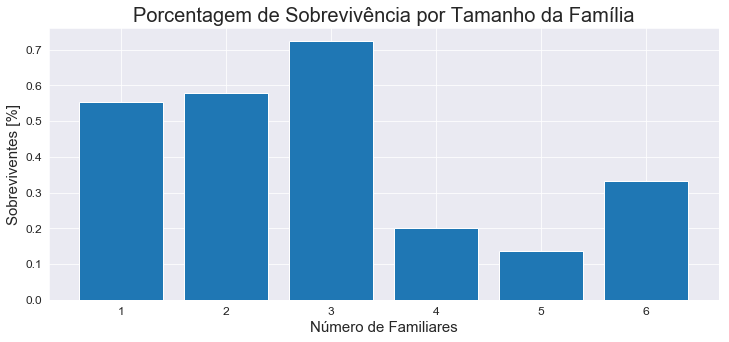

In [36]:
# Gerando a porcentgem de sobreviventes por número de membros da família
x_axis = df_survived.query('travel_alone == "no"')['family_size'].unique()
y_axis = []
for x in x_axis:
    y_axis.append(df_survived['family_size'].value_counts()[x]/df['family_size'].value_counts()[x])

plt.figure(figsize=(12,5))
plt.bar(x_axis, y_axis)
plt.xlabel('Número de Familiares', fontsize=15)
plt.ylabel('Sobreviventes [%]', fontsize=15)
plt.title('Porcentagem de Sobrevivência por Tamanho da Família', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

Interessante notar que talvez exista um tamanho ideal de família. A medida que aumentamos o numero de acompanhantes a taxa de sobrevivencia tambem aumenta, porém até três familiares - mais de 70% de sobreviventes. A partir desse numero, aumentar um integrante diminui muito a taxa de sobrevivencia.

#### Pergunta 3 - A idade da pessoa foi um fator relevante?

A análise aqui será em relação a idade dos passageiros.

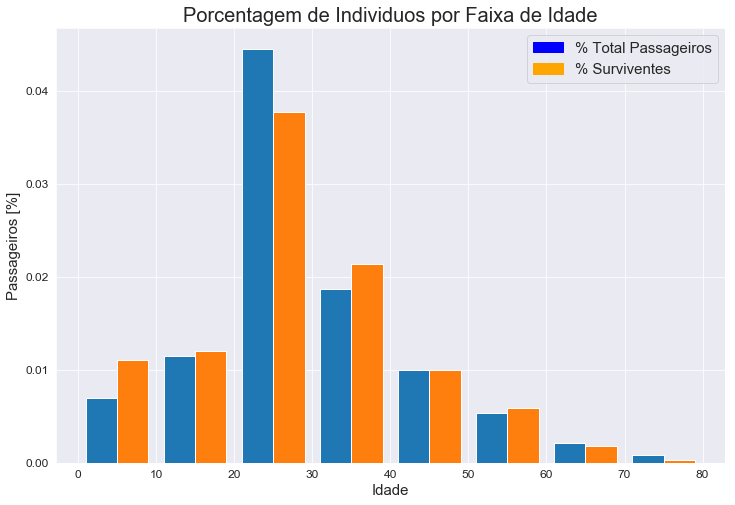

In [37]:
# Definindo a escala do eixo X
df1 = df['age'].describe()
low_limit = np.floor(df1['min'])
upper_limit = np.ceil(df1['max'])
bins = np.arange(low_limit, upper_limit+1, 10)

total = df['age']
survived = df_survived['age']

# Plotanto do gráfico
plt.figure(figsize=(12,8))
plt.hist([total, survived], bins, density=True)
plt.xlabel('Idade', fontsize=15)
plt.ylabel('Passageiros [%]', fontsize=15)
plt.title('Porcentagem de Individuos por Faixa de Idade', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Definindo os labels para legenda
orange_patch = mpatches.Patch(color='orange', label='% Surviventes')
blue_patch = mpatches.Patch(color='blue', label='% Total Passageiros')
plt.legend(handles=[blue_patch, orange_patch], fontsize=15);

No gráfico acima estão exibidos os percentuais do total de passageiros e total de sobreviventes por idade.

Podemos perceber que a percentual dos sobreviventes menores de dez anos é maior que o total de passageiros, indicando que indivíduos dessa idade teriam mais chances de sobrevivência.

Esse comportamento também é visto, embora em bem menor escala, para os indíviduos entre 30 e 40 anos e entre 50 a 60 anos.

Fazendo uma análise de forma geral, apesar de termos algumas faixas de idade com representatividade maior entre os sobreviventes que no total de passageiros, não é possível afirmar que a idade era fator relevante. Não podemos inferir uma relação que ter menor ou maior idade indicou maior ou menor chance de sobrevivência.

#### Pergunta 4 - Status econômico foi um fator que aumentou a taxa de sobrevivente?

Para essa análise, vamos considerar a classe das cabines (primeira, segunda e terceira classe).

Como vimos anteriormente, a varição na tarifa era muito grande. Inclusive, tinhamos pessoas viajando na primeira classe que haviam a tarifa como zero. Se considerassemos o valor pago pela passagem como indicador socio-econômico, essas pessoas da primeira classe seriam classificadas como de status social mais baixo e isso estaria errado.

De forma similar a análise anterior, vamos plotar as porcentagens nas amostras do total de passageiros e no total de sobreviventes.

In [38]:
def percentage_over_sample(column):
    """
    Função que calcula a porcentagem de cada parte da amostra entre o total de passageiros e os sobreviventes
    
    Argumentos:
        column: Coluna com as informações que serão avaliadas

    Retorna:
        :return: listas com a contribuição no total de passageiros, entre os sobreviventes e os labels do eixo X
    """
    
    # Obtendo os total de passageiros e número por classe
    # Como queremos o total, podemos contar qualquer coluna que tenha todos os valores disponíveis
    df1 = df.groupby(['survived', column]).count()['passenger_id']
    df2 = df.groupby(column).count()['passenger_id']

    #Obtenha o total de passageiros
    total_passenger = df1.sum()
    total_survived = df1['yes'].sum()

    # Definindo os labels
    x_labels = df[column].dropna(how='all').unique()
    x_labels = np.sort(x_labels)

    # Definindo as taxas total e de sobreviventes por deck
    total=[]
    survived=[]
    for x in x_labels:
        try:
            total.append(df2[x]/total_passenger)
            survived.append(df1['yes'][x]/total_survived)
        except:
            survived.append(0)
    
    return [total, survived, x_labels]

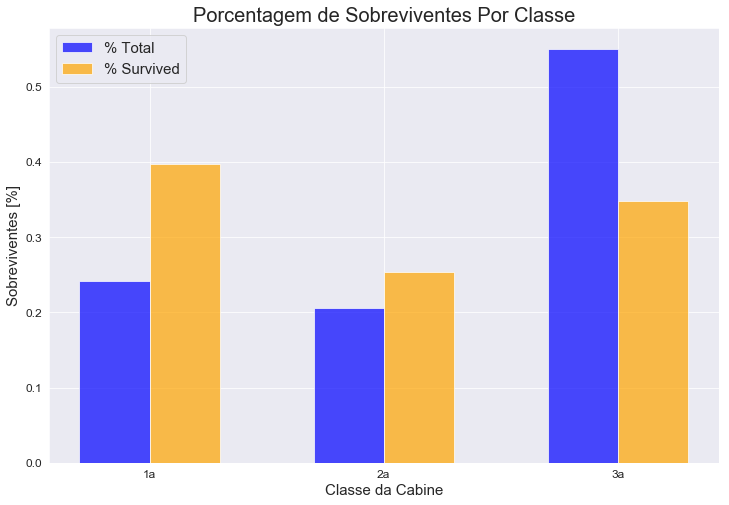

In [39]:
# Obtendo os valores do gráfico
[total, survived, x_labels] = percentage_over_sample('passenger_class') 
bins = np.arange(len(x_labels))  # localização no eixo x dos grupos
width = 0.3       # largura das barras

# tracando as barras
plt.figure(figsize=(12,8))
blue_bars = plt.bar(bins, total, width, color='blue', alpha=.7, label='% Total')
orange_bars = plt.bar(bins + width, survived, width, color='orange', alpha=.7, label='% Survived')

# Adicionando título e rótulos
plt.ylabel('Sobreviventes [%]', fontsize=15)
plt.xlabel('Classe da Cabine', fontsize=15)
plt.title('Porcentagem de Sobreviventes Por Classe', fontsize=20)
locations = bins + width / 2  # localização dos marcadores no eixo x
labels = ['1a', '2a', '3a']  # rótulos dos marcadores no eixo x mais adequados
plt.xticks(locations, labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adicionando legenda
plt.legend(fontsize=15, loc=2);

Como pode ser visto, o percentual de pessoas da primeira classe que sobreviveram foi maior que as outras classes. Alem disso, a representatividade dos passageiros da segunda classe aumentou entre os sobreviventes, indicando que esses passageiros tambem tiveram melhor sorte que os passageiros da terceira classe.

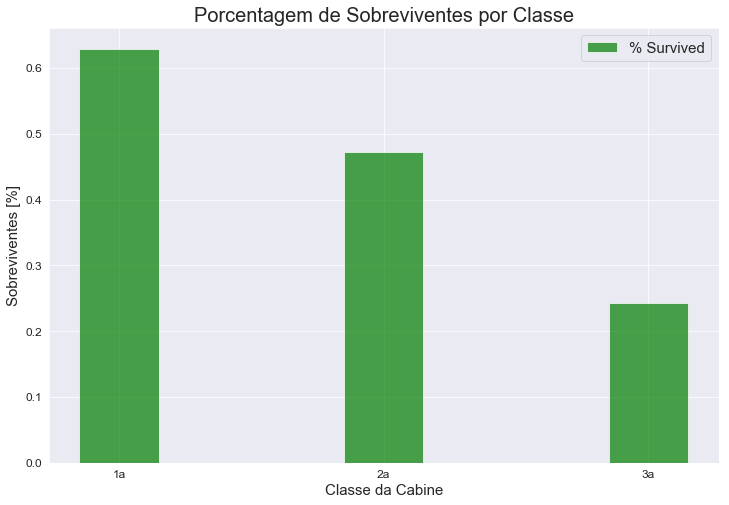

In [40]:
# Obtendo a porcentagem de sobrevivência
df1 = df.groupby(['survived', 'passenger_class']).count()['passenger_id']
df2 = df.groupby('passenger_class').count()['passenger_id']
rate_1st = df1['yes'][1]/df2[1]
rate_2nd = df1['yes'][2]/df2[2]
rate_3rd = df1['yes'][3]/df2[3]
rate = [rate_1st, rate_2nd, rate_3rd]

bins = np.arange(len(rate))  # a localização no eixo x dos grupos
width = 0.3       # a largura das barras

# tracando o gráfico
plt.figure(figsize=(12,8))
plt.bar(bins, rate, width, color='green', alpha=.7, label='% Survived')

# adicionando as informações no gráfico
plt.ylabel('Sobreviventes [%]', fontsize=15)
plt.xlabel('Classe da Cabine', fontsize=15)
plt.title('Porcentagem de Sobreviventes por Classe', fontsize=20)
labels = ['1a', '2a', '3a']  # rótulos dos marcadores no eixo x
locations = bins
plt.xticks(locations, labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# legenda
plt.legend(fontsize=15);

Com o gráfico acima, fica evidente a influência da classe de viagem com chance de sobrevivência.

#### Pergunta 5 - O local da cabine tem alguma influência? 

Vamos iniciar analisando se o deck que estava localizada a cabine teve alguma influência. É natural pensar que as cabines de decks mais altos tenham impactado positivamente nas chances de sobrevivência.

Vamos analisar a dispersão dos sobreviventes em relacao ao deck.

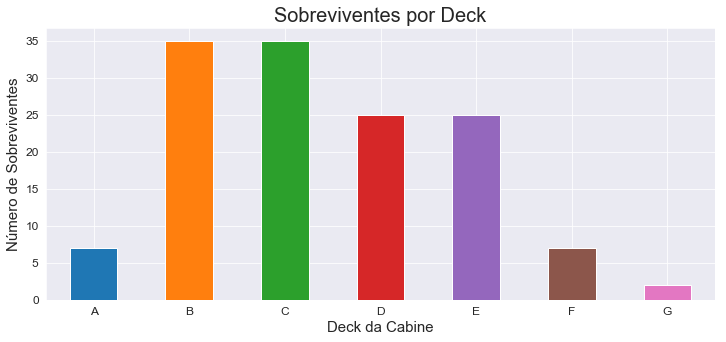

In [41]:
# Plotando um gráfico com o número de sobreviventes por deck
graph_values = df_survived.groupby('cabin_deck').count()['passenger_id']
plt.figure(figsize=(12,5))
graph_values.plot(kind='bar')
plt.ylabel('Número de Sobreviventes', fontsize=15)
plt.xlabel('Deck da Cabine', fontsize=15)
plt.title('Sobreviventes por Deck', fontsize=20)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12);

É possível ver que os decks B e C tiveram um número maior de sobreviventes, porém é de se imaginar que o número de cabines por deck seja variável. Sendo assim, a forma mais correta de avaliar é por porcentagens novamente.

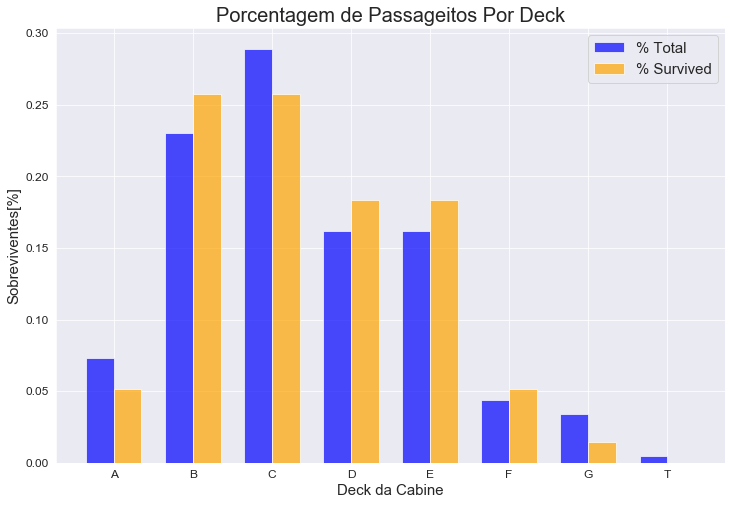

In [42]:
# Gerando os valores do gráfico
[total, survived, x_labels] = percentage_over_sample('cabin_deck')
bins = np.arange(len(x_labels))  # localização no eixo x dos grupos
width = 0.35                   # largura das barras

# tracando o gráfico
plt.figure(figsize=(12,8))
blue_bars = plt.bar(bins, total, width, color='blue', alpha=.7, label='% Total')
orange_bars = plt.bar(bins+width, survived, width, color='orange', alpha=.7, label='% Survived')

# título e rótulos
plt.ylabel('Sobreviventes[%]', fontsize=15)
plt.xlabel('Deck da Cabine', fontsize=15)
plt.title('Porcentagem de Passageitos Por Deck', fontsize=20)
locations = bins + width / 2  # localização dos marcadores no eixo x
labels = x_labels # rótulos dos marcadores no eixo x
plt.xticks(locations, labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# legenda
plt.legend(fontsize=15);

É possível notar que os decks B, D e E mostraram maior porcentagem de sobreviventes que entre o total de passageiros, entretanto a relação entre deck da cabine e sobrevivência não é algo muito evidente.

Essa conclusão é um pouco antagônica ao que encontramos anteriormente, que sugere um aumento na chance de sobrevivência com base na classe do passageiro.

Desta forma, vamos analisar a relação entre classe do passageiro e deck da cabine.

In [43]:
df.groupby(['passenger_class', 'cabin_deck']).count()['passenger_id']

passenger_class  cabin_deck
1                A             15
                 B             47
                 C             59
                 D             29
                 E             25
                 T              1
2                D              4
                 E              4
                 F              8
3                E              4
                 F              1
                 G              7
Name: passenger_id, dtype: int64

Na tabela acima, vemos que a maioria das pessoas que tiveram a informação da cabine divulgada estavam na primeira classe.

Sendo assim, a pouca amostra que temos das outras classes não impacta tanto a relação de sobrevivência com base no deck da cabine.

Vamos analisar agora em relação ao número da cabine.

In [44]:
print(f'Numeros unicos de cabines entre os passageiros: {df["cabin_num"].dropna().nunique()}')

print(f'Numeros unicos de cabines entre os sobreviventes: {df_survived["cabin_num"].dropna().nunique()}')

Numeros unicos de cabines entre os passageiros: 92
Numeros unicos de cabines entre os sobreviventes: 73


É possível ver que temos um número muito grande de cabines com valores únicos. Sendo assim, a melhor forma de analisar alguma tendência é pela distribuição desses valores dentro do conjunto de dados dos sobreviventes.

C:\Users\Leandro\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Leandro\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


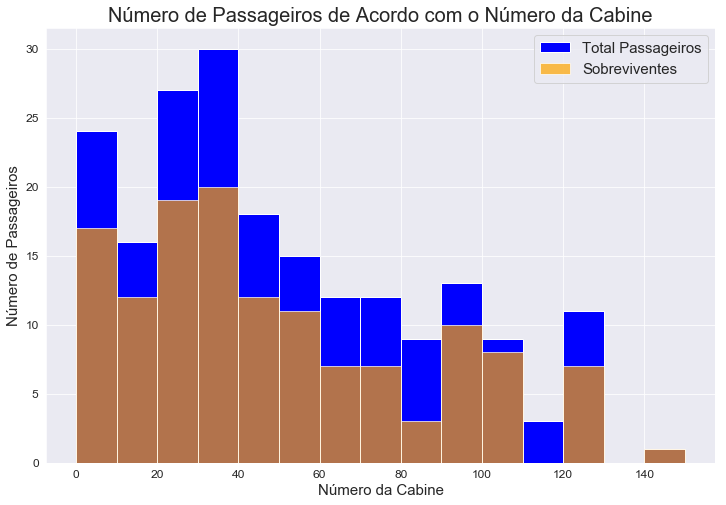

In [45]:
# Histograma das cabines dos passageiros e dos sobreviventes
# Definindo os dataframes dos passageiros que serão analisados

df1 = df.query('cabin_num == cabin_num') # eliminando as colunas sem informação
df1['cabin_num'] = df1['cabin_num'].astype('float')

df2 = df_survived.query('cabin_num == cabin_num')
df2['cabin_num'] = df2['cabin_num'].astype('float')

# Definindo os valores do gráfico
cabin_passengers = df1['cabin_num']
cabin_survived = df2['cabin_num']

# Plotando o gráfico
bins = np.arange(0,160,10)
plt.figure(figsize=(12,8))
plt.hist(cabin_passengers, bins, color='blue')
plt.hist(cabin_survived, bins, alpha=0.7, color='orange')
plt.xlabel('Número da Cabine', fontsize=15)
plt.ylabel('Número de Passageiros', fontsize=15)
plt.title('Número de Passageiros de Acordo com o Número da Cabine', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Total Passageiros','Sobreviventes'], fontsize=15);

É possível notar que os dois gráficos estão deslocado para a esquerda, o que indica que tinhamos mais passageiros, com informação divulgada, entre as cabines com numeros menores.

Entretanto, analisando a proporção entre os intervalos, o local da cabine não parece ter tido influência nas chances de sobrevivência. Proporcionalmente, a diferença entre o total de passageiros e os sobreviventes estão bem parecidas nos interalos que temos amostra suficientemente grande.

É possível inferir ainda que, pela proporção entre os dois gráficos, a maioria dos que sobreviveram tiveram identificação em qual cabine estava. No grafico abaixo essa conclusao fica mais evidente

C:\Users\Leandro\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


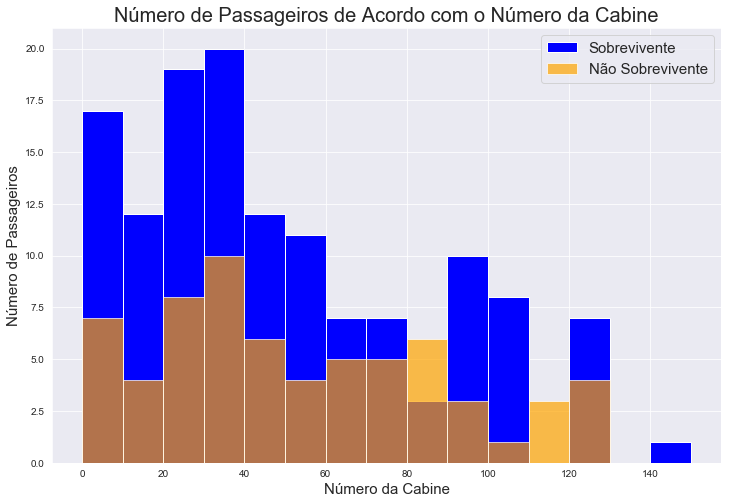

In [46]:
# Histograma das cabines dos passageiros com identifição de cabines sobreviventes e nao-sobreviventes
# Definindo os dataframes dos passageiros que serão analisados

df1 = df.query('cabin_num == cabin_num') # eliminando as colunas sem informação
df1 = df1.query('survived == "no"')
df1['cabin_num'] = df1['cabin_num'].astype('float')

df2 = df_survived.query('cabin_num == cabin_num')
df2['cabin_num'] = df2['cabin_num'].astype('float')

# Definindo os valores do gráfico
cabin_not_survived = df1['cabin_num']
cabin_survived = df2['cabin_num']

# Plotando o gráfico
bins = np.arange(0,160,10)
plt.figure(figsize=(12,8))
plt.hist(cabin_survived, bins, color='blue')
plt.hist(cabin_not_survived, bins, alpha=0.7, color='orange')
plt.xlabel('Número da Cabine', fontsize=15)
plt.ylabel('Número de Passageiros', fontsize=15)
plt.title('Número de Passageiros de Acordo com o Número da Cabine', fontsize=20)
plt.legend(['Sobrevivente','Não Sobrevivente'], fontsize=15);

## Conclusão

Como explicado no objetivo, a intenção do relatório não é fazer uma análise estatística profunda nos dados para chegar a conclusões finais. Nosso objetivo é analisar os dados procurando indicativos de características que pudessem aumentar as chances de sobrevivência ao desastre do Titanic.

Com base no exposto acima, vamos recordar nossas perguntas e os indicativos que tivemos a partir da analise dos dados.

Pergunta 1
    - O gênero do passageiro mostra alguma influência entre sobreviventes?
        - Os dados mostram que 70% das mulheres sobreviveram enquanto apenas 20% dos homens tiveram a mesma sorte.

Pergunta 2
    - Viajar acompanhado mostra algum aumento nas chances de sobrevivência?
        As pessoas que viajaram acompanhadas sobreviveram em uma relação 20% maior que as pessoas que viajaram sozinhas.
        Os integrantes da familia que viajavam juntos parecem não ter influência, porém o número de acompanhantes, sim.
        Os dados sugerem que viajar com 3 acompanhantes seria o ideal para ter mais chances de sobrevivência.

Pergunta 3
    - A idade da pessoa foi um fator relevante?
        As chances relacionadas com a idade da pessoa mostraram variação entre as faixas. Sendo assim, não podemos concluir que esse foi um fator relevante.
        Uma possível excessão foram os individuos menores de 10 anos que mostraram ralação de sobrevivência acima da média

Pergunta 4
    - Status econômico foi um fator que aumentou a taxa de sobrevivência?
        Para essa pergunta analisamos apenas a classe em que o passageiro viajava e notamos um idicativo que teve influência.
        Uma porcentagem maior de pessoas sobreviveram a medida que aumentavamos o status econômico ou seja, migrávamos para primeira classe.

Pergunta 5
    - O local da cabine tem alguma influência?
        A informação da cabine era que trazia mais incertezas pelo número de células sem informação.
        A análise sugere que não temos relação entre local da cabine, deck e número, e sobrevivência. Entretanto, parte dessa conclusão pode estar relacionada ao fato da grande maioria dessa informação estar apenas nos passageiros da primeira classe.
        Uma inferência que podemos fazer com base na informação das cabines é que os passageiros que tinham essa informação preenchida tiveram alta taxa de sobrevivência.        

### Limitações

Durante a análise dos dados encontramos alguns fatores que limitavam utilizar alguns dados, principalmente em referência a valores ausentes em algumas colunas. Apesar da identificação da cabine ter sido a coluna com maior número de dados ausentes, também identificamos essa limitação na coluna da idade e do porto de embarque.

Outra limitação, mas agora só relacionada a identificação das cabines, foram linhas com mais de uma informação para o mesmo atributo.

Para contornar essa situação foram adotadas as seguintes medidas:
- Porto de Embarque: Como esse não foi uma informação utilizada nas análises, não executamos nenhum tipo de alteração nessa coluna
    
- Age: Para a coluna com informação da idade, os dados ausesntes foram preenchidos com a média da idade da amostra. O impacto dessa ação é considerável, pois 20% da nossa amostra não tinha informação de idade e a taxa de sobrevivência desse grupo foi de, aproximadamente, 29%.
    
- Cabine: Essa informação foi considerado o deck e a numeração da primeira cabine com as informações completas. O impacto dessa ação não pareceu aumentar muito o grau de incerteza pela proximidade dos decks e números das cabines considerados e desconsiderados.
    
Outras alterações foram feitas para facilitar a análise dos dados, como inclusão de uma coluna com informação se o passageiro viajava sozinho, e alterado o tipo de dado do gênero e indicação de sobrevivência para dados categoricos.

### Referências

Para escrever o relatório foram utilizadas as seguintes referências:

- Pandas Documentation - https://pandas.pydata.org/pandas-docs/stable/index.html#


- Numpy Documentation - https://docs.scipy.org/doc/numpy/reference/index.html


- Matplotlib Pyplot Documentation - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html


- Python Documentation (regular expression) - https://docs.python.org/3/library/re.html


- StackOverflow Forum


    - Operador Logico "E" em query:  
        https://stackoverflow.com/questions/469913/regular-expressions-is-there-an-and-operator  
        https://stackoverflow.com/questions/3041320/regex-and-operator
    
     
    - Como retornar apenas os valores nulos em uma query:  
      https://stackoverflow.com/questions/37863660/pandas-dataframe-query-fetch-not-null-rows-pandas-equivalent-to-sql-is-no
    
    
    - Como alterar os tamanhos dos graficos com matplotlib:  
      https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
    
    
    - Como alterar valores numericos para ordinais:  
      https://stackoverflow.com/questions/9647202/ordinal-numbers-replacement
    
- Aulas do Curso Funcamentos em Data Science I - https://br.udacity.com/course/python-fundamentos-data-science--nd110


- Titanicos em Acao - https://titanicosemacao.wordpress.com/2010/04/26/cabines-serie-luxos-do-titanic/


- Kaggle - https://www.kaggle.com/c/titanic/data